In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [75]:
sp = pd.read_csv('sp500_data.csv', index_col=0)
sp

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [76]:
stocks = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
sp = sp[stocks]
sp = sp.T

In [77]:
sp

,1993-01-29,1993-02-01,1993-02-02,1993-02-03,1993-02-04,1993-02-05,1993-02-08,1993-02-09,1993-02-10,1993-02-11,...,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01
AAPL,-0.024235,0.064618,-0.016148,-0.032305,-0.016157,-0.064618,-0.016148,-0.004035,-0.040383,-0.020191,...,0.649994,-1.110001,0.120003,-0.450004,0.900002,-1.360001,-0.919998,-0.930000,-0.140000,-0.300004
AMZN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.090027,-5.339997,-0.709991,10.399994,-4.130005,2.029999,-3.660004,-5.120026,-0.110016,-1.959991
AXP,0.137909,-0.068951,-0.045970,0.045970,-0.022981,0.045970,0.045970,-0.045969,-0.022981,0.000000,...,0.528023,-0.328765,0.567875,-0.079703,-0.199258,-1.105863,-0.288920,-1.414705,-0.449997,-0.239997
COP,0.138703,0.070070,-0.093424,0.023359,0.093424,0.140137,-0.046712,0.000000,-0.140137,0.093424,...,-0.220002,-0.200001,0.100002,0.489998,-0.299999,-0.949997,0.029998,-0.410000,-0.119999,-1.479999
COST,0.000000,-0.149664,0.049888,0.099776,-0.049888,-0.099776,0.000000,-0.324272,0.000000,-0.024944,...,1.009995,-0.289993,-0.649994,-0.790008,-1.000000,-1.000000,0.119996,-1.319993,-1.320007,0.700012
CSCO,0.003106,0.018602,0.020147,-0.012399,-0.013943,-0.015496,-0.009301,-0.040293,0.021691,-0.012399,...,0.357246,-0.208393,-0.158775,-0.208393,-0.277860,-0.158775,-0.208393,-0.446558,-0.367171,-0.070000
CVX,0.072921,0.102089,0.029168,0.058337,0.044272,0.029514,0.088543,-0.029514,0.088543,0.073786,...,-0.010002,-0.250000,0.459999,0.129997,-0.710006,-1.110001,0.360000,-0.809998,-0.979996,-0.210007
GOOGL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.179993,1.000000,0.270020,3.600037,-3.909973,-2.349976,-6.650024,-5.500000,-5.050049,-0.359985
HD,0.106182,0.075843,-0.030339,0.000000,-0.060671,-0.106175,-0.182019,0.060671,0.060671,0.045505,...,0.790000,0.790001,0.140000,-0.059998,-0.590004,-1.000000,-0.169999,-1.019997,-0.020005,-0.379997
INTC,-0.050488,0.095367,0.000000,-0.050495,0.000000,-0.047687,-0.019632,-0.011223,0.044880,-0.053295,...,0.299999,-0.330002,0.000000,-0.220001,-0.240002,-0.030000,-0.490000,-0.310002,-0.209999,-0.310000


Text(0, 0.5, 'distance')

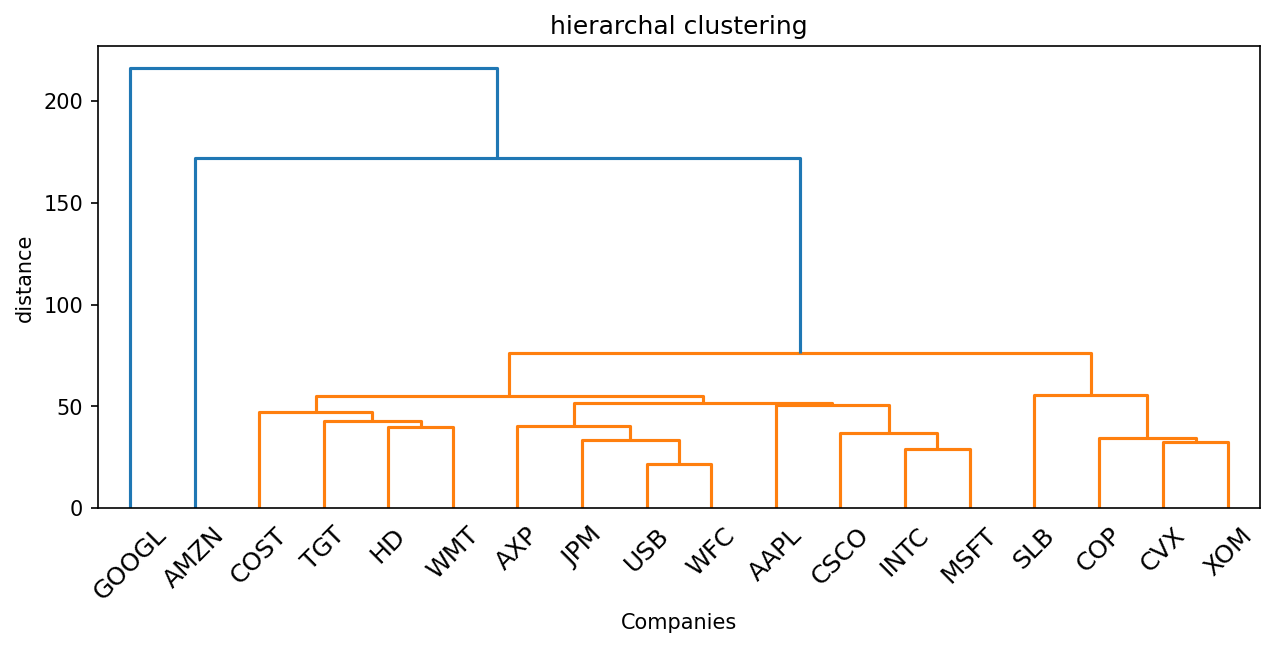

In [84]:
Z = linkage(sp, method='complete')
plt.figure(figsize=(10, 4), dpi= 150)
dendrogram(Z, labels= sp.index, leaf_rotation=45)
plt.title('hierarchal clustering')
plt.xlabel('Companies')
plt.ylabel('distance')